# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Hugo Amadeus Primo Adi
- Email:m232d4ky1973@bangkit.academy
- Id Dicoding:hugoamadeus

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan hari libur yang terkait dengan penurunan atau kenaikan rata-rata penyewaan?
- Bagaimana korelasi suhu dengan order bike riding?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv('https://raw.githubusercontent.com/HugoAmadeus/Submission/main/Data/day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour = pd.read_csv('https://raw.githubusercontent.com/HugoAmadeus/Submission/main/Data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa tipe data

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ",data_day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
print("Jumlah duplikasi: ",data_hour.duplicated().sum())

Jumlah duplikasi:  0


# Cleaning data


In [11]:
data_day["dteday"] = pd.to_datetime(data_day["dteday"])

In [13]:
data_hour["dteday"] = pd.to_datetime(data_hour["dteday"])

In [14]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
data_day['weekday_name'] = data_day['dteday'].dt.day_name()

In [17]:
data_hour['weekday_name'] = data_hour['dteday'].dt.day_name()

## Exploratory Data Analysis (EDA)

In [18]:
data_bike = data_hour.merge(data_day, on='dteday', how='inner', suffixes=('_hour', '_day'))
data_bike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weekday_name_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday


In [19]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}
data_bike['weather_label'] = data_bike['weathersit_day'].map(weather_labels)

In [20]:
data_bike.describe(include="all")

<ipython-input-20-90e3eea5bb6b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_bike.describe(include="all")


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weekday_name_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,11040
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN,NaN


In [21]:
data_bike.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
0,Curah Hujan Ringan,1914.700855
2,Kabut,4062.717595
1,Jernih,4895.177083


In [22]:
data_bike.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [23]:
data_bike.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [24]:
data_bike.registered_hour.sum()

2672662

In [25]:
data_bike.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
data_bike['dteday'] = pd.to_datetime(data_bike['dteday'])
data_bike['season_day'] = data_bike.season_hour.astype('category')
data_bike['mnth_day'] = data_bike.mnth_hour.astype('category')
data_bike['holiday_day'] = data_bike.holiday_hour.astype('category')
data_bike['weekday_day'] = data_bike.weekday_hour.astype('category')
data_bike['workingday_day'] = data_bike.workingday_hour.astype('category')
data_bike['weathersit_day'] = data_bike.weathersit_hour.astype('category')

In [27]:
print(data_bike.columns)

Index(['instant_hour', 'dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'weekday_name_hour', 'instant_day',
       'season_day', 'yr_day', 'mnth_day', 'holiday_day', 'weekday_day',
       'workingday_day', 'weathersit_day', 'temp_day', 'atemp_day', 'hum_day',
       'windspeed_day', 'casual_day', 'registered_day', 'cnt_day',
       'weekday_name_day', 'weather_label'],
      dtype='object')


In [28]:
data_bike = data_bike.drop("instant_hour", axis=1)
data_bike.head()

,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weekday_name_day,weather_label
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut


In [29]:
data_bike.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [30]:
data_bike.head(10)

,date,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weekday_name_day,weather_label
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,...,1,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Kabut


## Visualization & Explanatory Analysis

### Pertanyaan 1:

*   Bagaimana hubungan hari libur yang terkait dengan penurunan atau kenaikan rata-rata penyewaan?

<ipython-input-31-1ef1725339aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set2')


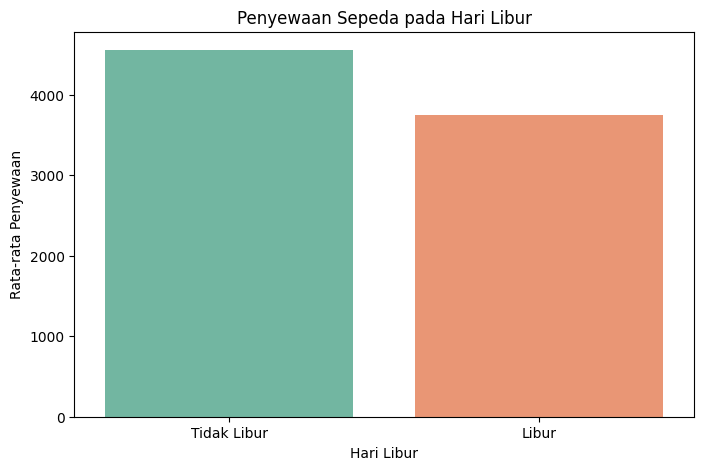

In [31]:
avg_holiday = data_bike.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set2')

plt.title('Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0,1],['Tidak Libur','Libur'])

plt.show()

### Pertanyaan 2:

Bagaimana korelasi suhu dengan order bike riding?

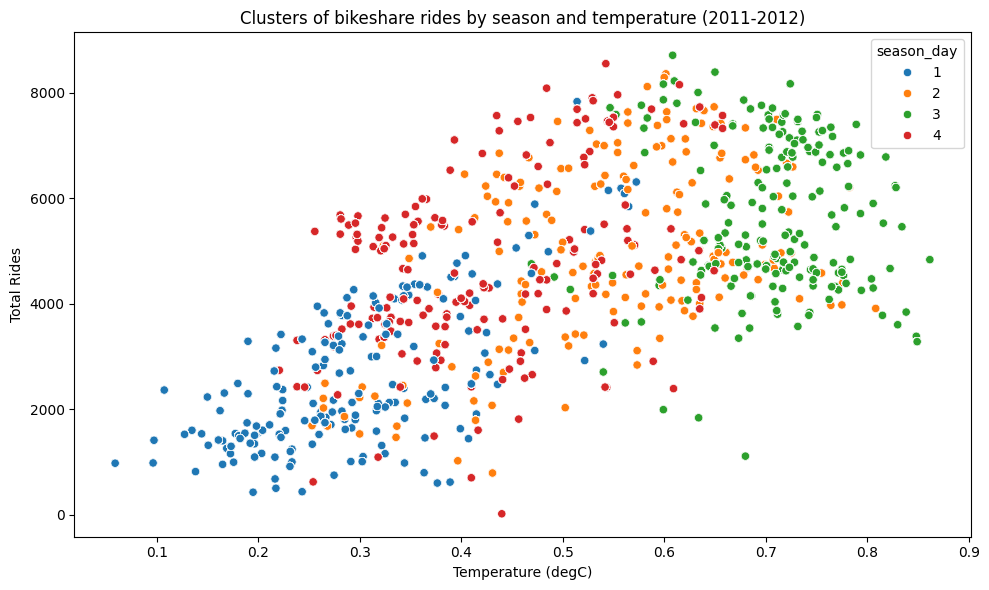

In [32]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp_day', y='cnt_day', data=data_bike, hue='season_day')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

plt.tight_layout()
plt.show()

## Conclusion

- Hal ini dapat disebabkanoleh tingginya aktivitas transportasi pada hari-hari kerjja ketika orang-orang bepergian ke pekerjaannya maupun pulang dari pekerjaannya.
Kenaikan penyewaan sepeda pada hari-hari kerja kemungkinan cerminan dari kebutuhan orang-orang beraktivitas.
- Order sepeda mempunyai nilai minimum saat winter. Namun seiring dengan meningkatnya temperatur, permintaan penyewaan sepeda memiliki tingkat nilai tertinggi pada saat summer.

# Membuat Dashboard

In [33]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [34]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.827s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [35]:
import urllib
print("Password/Enpoint IP for localtunnel is: ",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is:  34.139.190.56


In [36]:
!streamlit run /content/bike_sharing\ \(3\).py .py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.813s
your url is: https://blue-zoos-throw.loca.lt
